IMPORT THE LIBRARIES

In [430]:
# Import the necessary libraries
import pandas as pd       # For dataframe
import seaborn as sns     # For visualization
import matplotlib.pyplot as plt   # For visualozation
from sklearn.model_selection import train_test_split # For training and testing
from sklearn.preprocessing import StandardScaler   # For preprocessing
from sklearn.linear_model import LogisticRegression # Model selection
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report  # For accuracy measurement
import pickle as pkl


IMPORT THE DATA

In [431]:
#Import the data
data= 'app\\Dataset\\loan_approval_dataset.csv'
df= pd.read_csv(data)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [432]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


EXPLORATORY DATA ANALYSIS (EDA)

In [433]:
#Data exploration
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [434]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [436]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [437]:
df.duplicated().any()

np.False_

DATA CLEANING AND PREPROCESSING

In [438]:
# Remove the spaces in the column name
df.columns = df.columns.str.strip()

In [439]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [483]:
corr = df.corr(numeric_only=True)

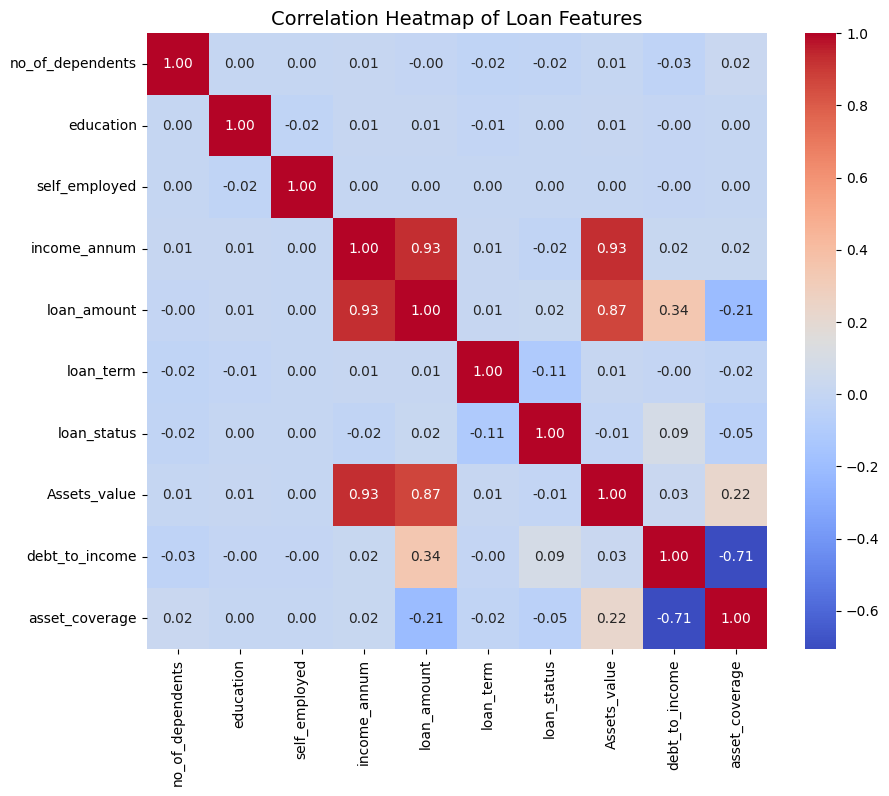

In [484]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Loan Features", fontsize=14)
plt.show()

In [ ]:
# Check for the unique values in the object column
print(df['loan_status'].unique())
print(df['education'].unique())
print(df['self_employed'].unique())

[' Approved' ' Rejected']
[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [441]:
# Remove the space at the begining of the values
df['loan_status'] = df['loan_status'].str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()

DATA PREPROCESSING

In [442]:
#Encode categorical data
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})

In [443]:
#CHECK THE DATA CLEANED AND PREPROCESSED DATA
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


DATA VISUALIZATION FOR ANALYSIS

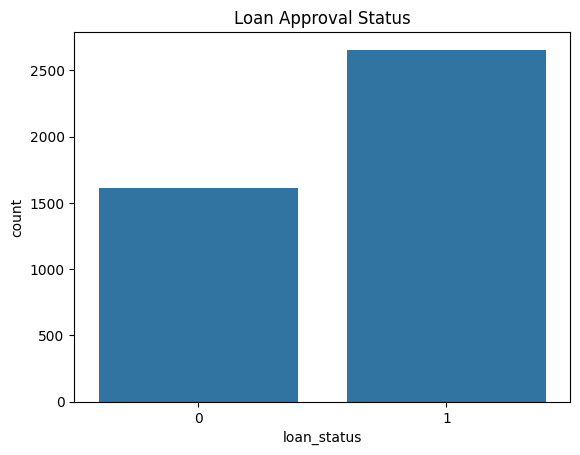

In [444]:
#Data visualizaion
#Visualizing Loan approval VS Rejection rate
def loan_status(info):
    sns.countplot(x=info, data=df)
    plt.title('Loan Approval Status')
    plt.show()
loan_status('loan_status')


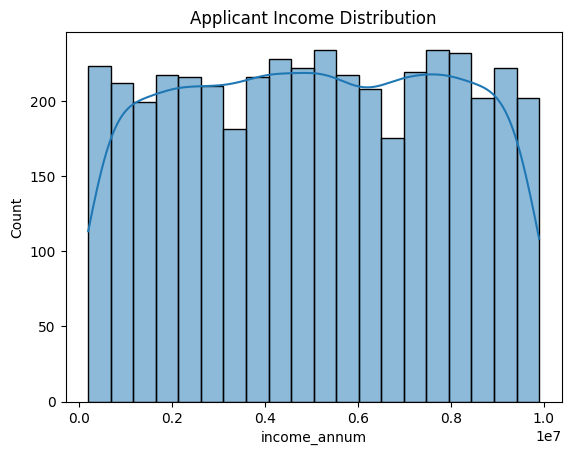

In [445]:
sns.histplot(df['income_annum'], bins=20, kde=True)
plt.title('Applicant Income Distribution')
plt.show()


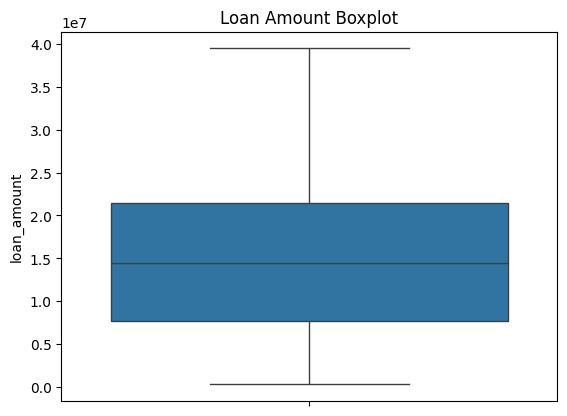

In [446]:
sns.boxplot(y='loan_amount', data=df)
plt.title('Loan Amount Boxplot')
plt.show()


FEATURE ENGINEERING

In [447]:
df = df.drop(columns=['loan_id', 'cibil_score'])
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [448]:
# Add all the asset value and create a new column
df['Assets_value']= df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value']
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df['asset_coverage'] = df['Assets_value'] / df['loan_amount']
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Assets_value,debt_to_income,asset_coverage
0,2,1,0,9600000,29900000,12,2400000,17600000,22700000,8000000,1,50700000,3.114583,1.695652
1,0,0,1,4100000,12200000,8,2700000,2200000,8800000,3300000,0,17000000,2.975610,1.393443
2,3,1,0,9100000,29700000,20,7100000,4500000,33300000,12800000,0,57700000,3.263736,1.942761
3,3,1,0,8200000,30700000,8,18200000,3300000,23300000,7900000,0,52700000,3.743902,1.716612
4,5,0,1,9800000,24200000,20,12400000,8200000,29400000,5000000,0,55000000,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,2800000,500000,3300000,800000,0,7400000,2.300000,3.217391
4265,0,0,1,3300000,11300000,20,4200000,2900000,11000000,1900000,1,20000000,3.424242,1.769912
4266,2,0,0,6500000,23900000,18,1200000,12400000,18100000,7300000,0,39000000,3.676923,1.631799
4267,1,0,0,4100000,12800000,8,8200000,700000,14100000,5800000,1,28800000,3.121951,2.250000


In [449]:
df.drop(columns= ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace= True)

In [450]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,loan_status,Assets_value,debt_to_income,asset_coverage
0,2,1,0,9600000,29900000,12,1,50700000,3.114583,1.695652
1,0,0,1,4100000,12200000,8,0,17000000,2.975610,1.393443
2,3,1,0,9100000,29700000,20,0,57700000,3.263736,1.942761
3,3,1,0,8200000,30700000,8,0,52700000,3.743902,1.716612
4,5,0,1,9800000,24200000,20,0,55000000,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,0,7400000,2.300000,3.217391
4265,0,0,1,3300000,11300000,20,1,20000000,3.424242,1.769912
4266,2,0,0,6500000,23900000,18,0,39000000,3.676923,1.631799
4267,1,0,0,4100000,12800000,8,1,28800000,3.121951,2.250000


DATA MODELLING

In [451]:
df['loan_status'].value_counts(normalize=True)

loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64

In [452]:
# Split the data into x and y
x= df.drop(columns= ['loan_status'])
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,Assets_value,debt_to_income,asset_coverage
0,2,1,0,9600000,29900000,12,50700000,3.114583,1.695652
1,0,0,1,4100000,12200000,8,17000000,2.975610,1.393443
2,3,1,0,9100000,29700000,20,57700000,3.263736,1.942761
3,3,1,0,8200000,30700000,8,52700000,3.743902,1.716612
4,5,0,1,9800000,24200000,20,55000000,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,7400000,2.300000,3.217391
4265,0,0,1,3300000,11300000,20,20000000,3.424242,1.769912
4266,2,0,0,6500000,23900000,18,39000000,3.676923,1.631799
4267,1,0,0,4100000,12800000,8,28800000,3.121951,2.250000


In [453]:
y= df['loan_status']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [454]:
#Split to train and test
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42, stratify= y)

Scale the split data

In [455]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train) # Scale the training data
X_test_scaled = scaler.transform(x_test)       # Transform the test data

USE SMOTE TO HANDLE DATA IMBALANCE

In [456]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
y_train_res.value_counts(normalize=True)


loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64

CHOOSE A MODEL (LOGISTIC REGRESSION)

In [457]:
#model = LogisticRegression() # Using Logistic regression for modelling
model = LogisticRegression(class_weight='balanced', random_state=42) # To handle class imbalance


In [458]:
#Fit the model
model= model.fit(X_train_res, y_train_res)


In [459]:
#Make a prediction
y_pred= model.predict(X_test_scaled)
y_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(1281,))

CHECK CONFUSION MATRIX AND CLASSIFICATION REPORT (LOGISTIC REGRESSION)

In [460]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[261 223]
 [343 454]]
              precision    recall  f1-score   support

           0       0.43      0.54      0.48       484
           1       0.67      0.57      0.62       797

    accuracy                           0.56      1281
   macro avg       0.55      0.55      0.55      1281
weighted avg       0.58      0.56      0.56      1281



CONFUSION MATRIX VISUALIZATION (LOGISTICS REGRESSION)

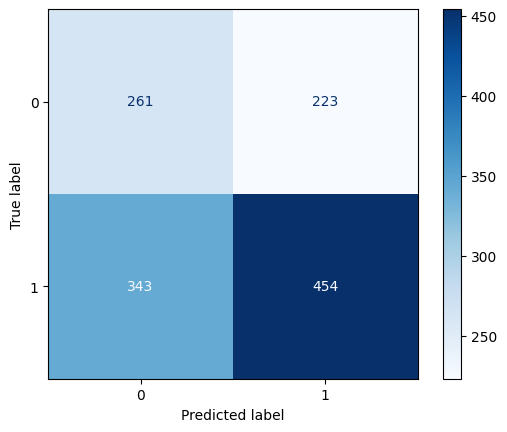

In [461]:
cm1= confusion_matrix(y_test, y_pred)
display_lo = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
display_lo.plot(cmap="Blues")

CHECK ANOTHER MODEL (RANDOM FOREST)

In [462]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [463]:
model_random= RandomForestClassifier(class_weight='balanced', random_state=42)
model_random= model_random.fit(X_train_res, y_train_res)

#model2.fit(X_train_scaled, y_train)

In [464]:
y_pred_rand= model_random.predict(X_test_scaled)
y_pred_rand

array([0, 1, 1, ..., 0, 1, 1], shape=(1281,))

In [465]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rand))
print(classification_report(y_test, y_pred_rand))


[[224 260]
 [284 513]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       484
           1       0.66      0.64      0.65       797

    accuracy                           0.58      1281
   macro avg       0.55      0.55      0.55      1281
weighted avg       0.58      0.58      0.58      1281



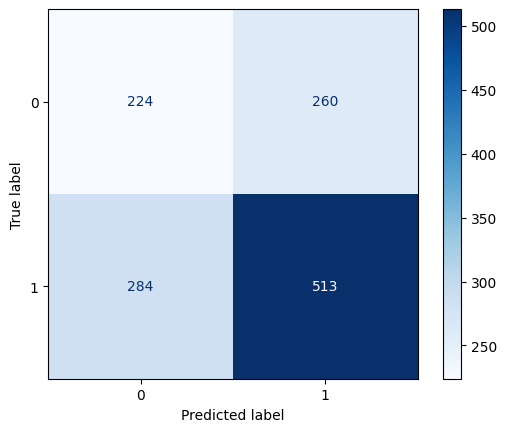

In [466]:
#CONFUSION MATRIX FOR RANDOM FOREST
cm2 = confusion_matrix(y_test, y_pred_rand)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model_random.classes_)
disp.plot(cmap="Blues")


USE XGBOOST MODEL

In [467]:
#Import the model
import xgboost as xgb

In [468]:
import numpy as np
neg, pos = np.bincount(y_train)   # counts of class 0 and 1
scale = neg / pos
print("scale_pos_weight =", scale)

scale_pos_weight = 0.607315761161915


In [469]:
model3 = xgb.XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=6,             # tree depth
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    scale_pos_weight=scale,  # weight to handle imbalance
    eval_metric='logloss',   # avoids warnings
    random_state=42
)

model3.fit(X_train_res, y_train_res)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [470]:
y_pred_xgb= model3.predict(X_test_scaled)
y_pred_xgb

array([0, 1, 1, ..., 0, 0, 1], shape=(1281,))

In [471]:
model3.score(X_test_scaled, y_test)

0.5573770491803278

In [472]:
#CHECK CALSSIFICATION REPORT FOR XGBOOST
print(confusion_matrix(y_test, model3.predict(X_test_scaled)))
print(classification_report(y_test, model3.predict(X_test_scaled)))

[[253 231]
 [336 461]]
              precision    recall  f1-score   support

           0       0.43      0.52      0.47       484
           1       0.67      0.58      0.62       797

    accuracy                           0.56      1281
   macro avg       0.55      0.55      0.55      1281
weighted avg       0.58      0.56      0.56      1281



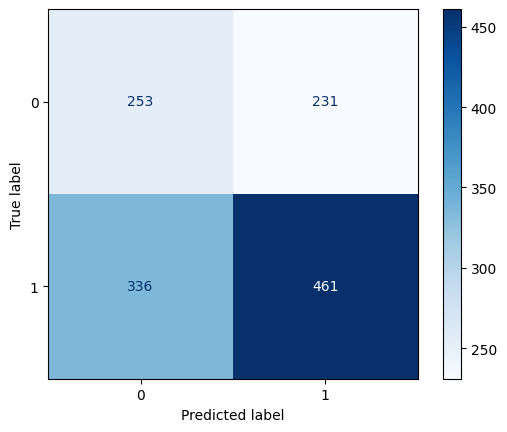

In [473]:
#CONFUSION MATRIX FOR XGBOOST
cm3 = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=model3.classes_)
disp.plot(cmap="Blues")


After comparing Logistic Regression, Random Forest, and XGBoost, I chose Random Forest for deployment.
Although all models had similar accuracy, Random Forest achieved the best F1-score (0.65) and recall (0.64) for the “approved” class, which is crucial in minimizing the rejection of eligible applicants.
Its ensemble structure also captures complex non-linear relationships between applicant income, loan amount, and asset value better than linear models.

TURN THE MODEL BUILT TO A FILE FOR EXTERNAL USE

In [474]:
import pickle as pkl

In [475]:
with open("Loan approval status model.pkl", "wb") as f:
    pkl.dump(model_random, f)

Turn the scale to a picke file

In [476]:
with open("Loan approval status input scaling.pkl", "wb") as f:
    pkl.dump(scaler, f)

TEST THE MODEL

In [477]:
# Load from file
with open("Loan approval status model.pkl", "rb") as f:
    loaded_model = pkl.load(f)

# Now you can use it directly
y_preds = loaded_model.predict(X_test_scaled)
y_preds


array([0, 1, 1, ..., 0, 1, 1], shape=(1281,))

In [478]:
for i in y_preds:
    if i==1:
        print('Approved')
    else:
        print('Not Approved')

Not Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Not Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Not Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Not Approved
Approved
Not Approved
Approved
Approved
Not Approved
Approved
Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Approved
Approved
Not Approved
Not Approved
Approved
Not Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Approved
Approved
Not Approved
Approved
Not Approved
Not Approved
Approved
Approved
Approved
Not Approved
Not Approved
Not Approved
Approved
Approved
Not Approved
Approved
Approved
Not Approved
Not Approved
Not 

In [479]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Uding hyperparameter tunning
# Define the model
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Regularization strength
    'penalty': ['l1', 'l2'],          # Type of regularization
    'solver': ['liblinear', 'saga']   # Optimizers that support l1/l2
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit on training data
grid.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [480]:
y= best_model.predict(X_test_scaled)
y

array([1, 0, 1, ..., 1, 1, 1], shape=(1281,))

In [481]:
best_model.score(X_test_scaled, y_test)

0.5628415300546448

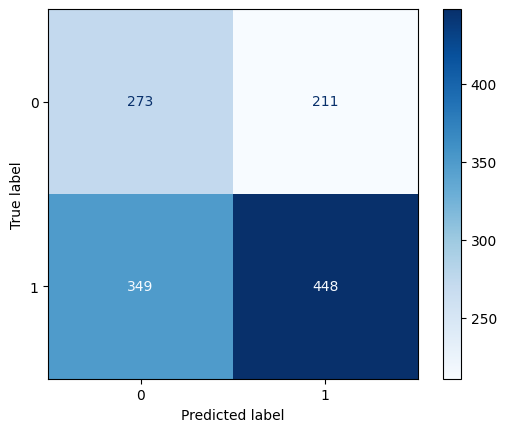

In [482]:
#CONFUSION MATRIX FOR XGBOOST
cm4 = confusion_matrix(y_test, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
